<a href="https://colab.research.google.com/github/Numann-Malik/Project-1/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
- Numann Malik

We clean our data, perform exploratory and explanatory data analyses, preprocess for machine learning, and build regression models to predict food sales.

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'sales_predictions.csv'
df = pd.read_csv(filename)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## Data Cleaning

We identify the number of rows and columns.

In [4]:
df.shape # 8523 rows and 12 columns

(8523, 12)

We identify the datatypes of each variable.


In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We check for any duplicates.

In [6]:
df.duplicated().sum() # No duplicates

0

We identify missing values.

In [7]:
df.isna().sum() # 1463 missing item weights and 2410 missing outlet sizes

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We address the missing values below with explanation.

In [8]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True) # We don't lose a significant amount of data, but remain wary or errors now being introduced
df['Outlet_Size'].fillna('Missing', inplace=True) # Not enough missing values to warrant column removal

We confirm that there are no missing values after addressing them.

In [9]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [12]:
df['Outlet_Establishment_Year'].value_counts() # No apparent inconsistencies

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [13]:
# Create replacement dictionary 
replacement_dict = {'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}
# Replace values using replacement dictionary
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replacement_dict)
df['Item_Fat_Content'].value_counts() # Low and Regular Fat Content are now consistent

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Type'].value_counts() # No apparent inconsistencies

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
df['Outlet_Size'].value_counts() # No apparent inconsistencies

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [16]:
df['Outlet_Location_Type'].value_counts() # No apparent inconsistencies

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [17]:
df['Outlet_Type'].value_counts() # No apparent inconsistencies

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

For any numerical columns, we obtain the summary statistics of each (min, max, mean).

In [18]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# Exploratory Visuals

We first look at the frequency distribution of items based on their list price.

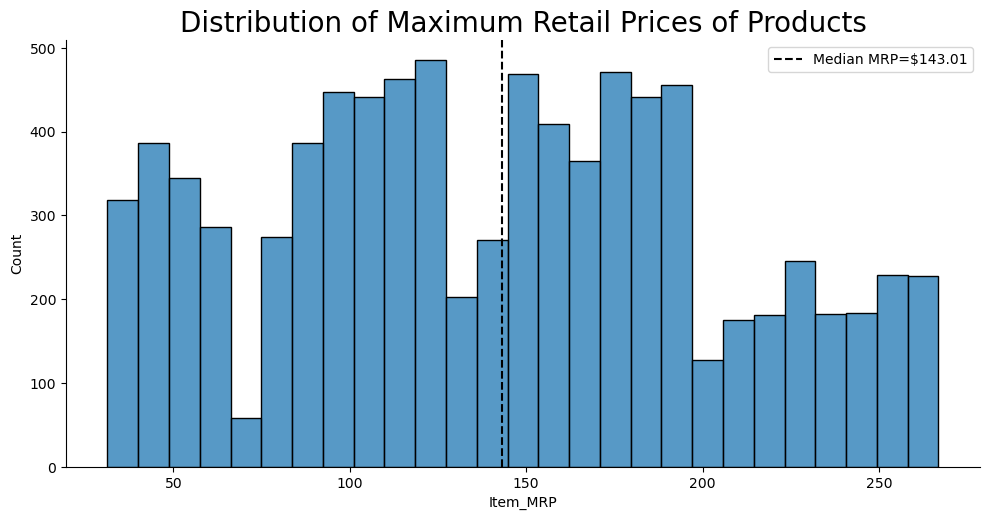

In [19]:
g = sns.displot(data=df, x='Item_MRP', aspect = 2)

median = df['Item_MRP'].median()

g.ax.set_title('Distribution of Maximum Retail Prices of Products', fontsize = 20)

g.ax.axvline(median, color='k', ls='--', 
            label=f'Median MRP=${median:,.2f}')
g.ax.legend();

MRPs are widely distributed amongst food items. There is one particularly low count around $70 range.

Next we look at a boxplot for the Item Visibility across all products.

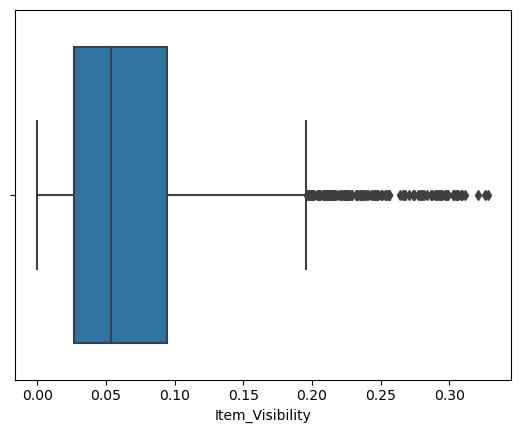

In [20]:
sns.boxplot(data=df, x='Item_Visibility');

The above indicates there are many outliers consisting of disproportionately higher percentages of total display area in stores allocated to particular products. Most items have relatively lower visibility in stores.

Now we define a function that displays both a histogram and a boxplot for the distribution of item weights and outlet sales.

In [21]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

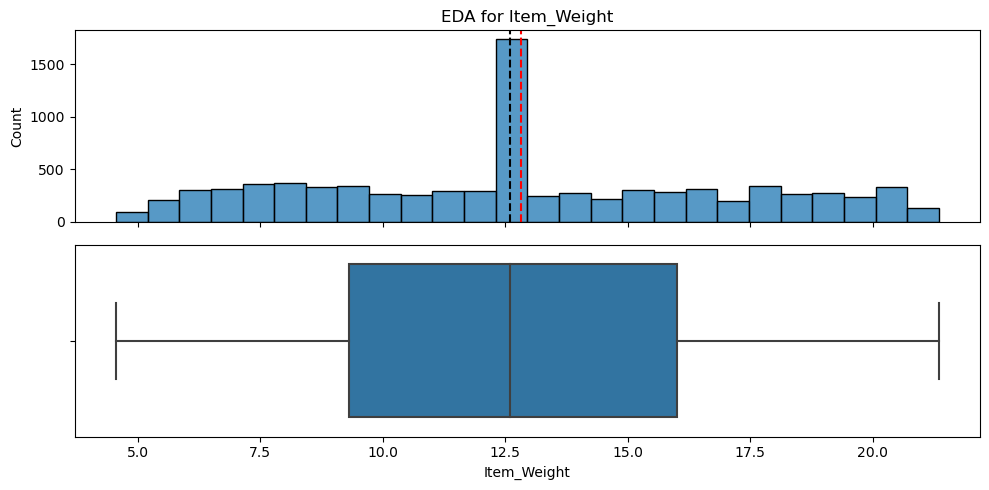

In [22]:
plot_numeric(df,'Item_Weight')

Between 25% and 75%, i.e. the interquartile range, we have half of the item weights concentrated between 9.31 and 16.

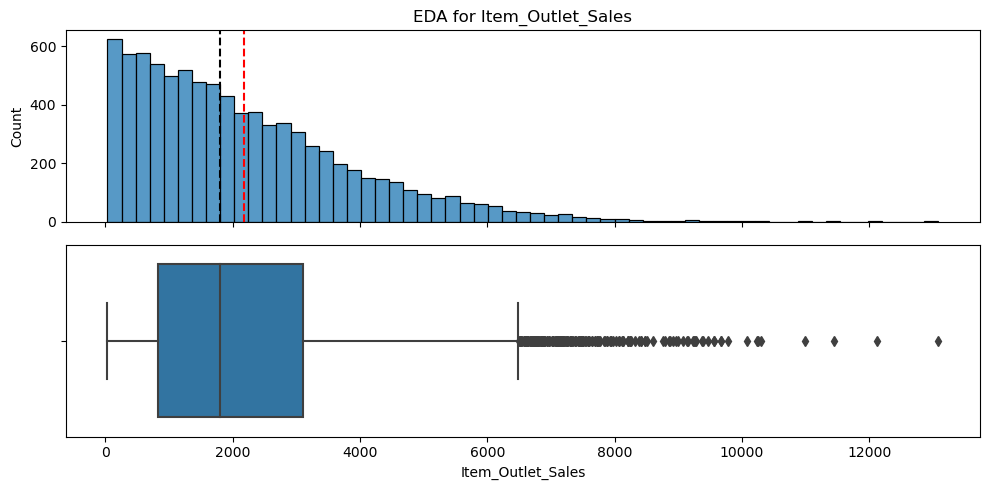

In [23]:
plot_numeric(df,'Item_Outlet_Sales')

Outlet Sales are heavily distributed until the 3100 mark. Beyond the 6400 mark we find many outliers.

Finally, we explore the different correlations between quantitative columns:

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_11206/38677684.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues');


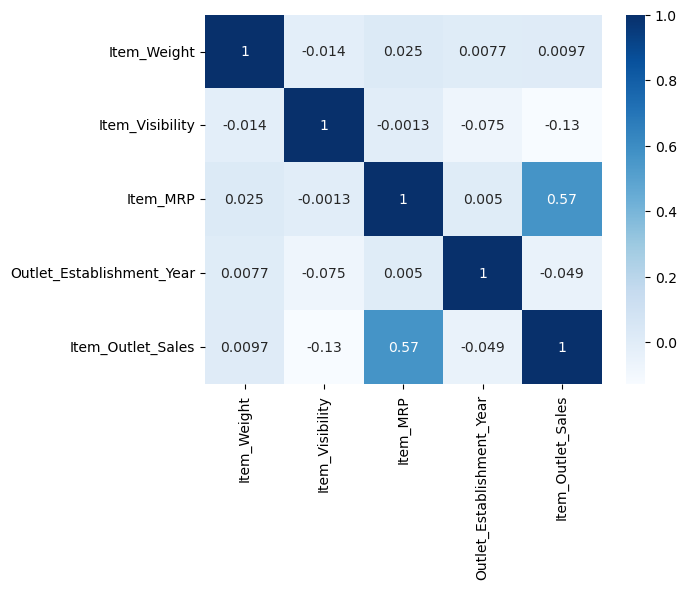

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There appears to be almost no correlations except a positively moderate one between Maximum Retail Prices and Product Sales. Below is a scatter plot illustrating this.

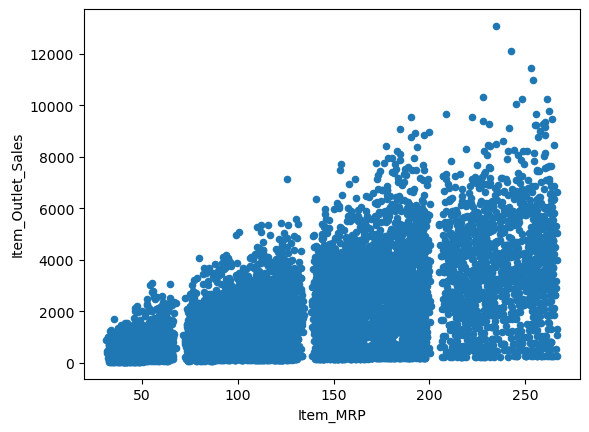

In [25]:
df.plot.scatter(x = 'Item_MRP', y= 'Item_Outlet_Sales');

# Explanatory Visuals

Now we go deeper into the analysis to identify trends. We start off by functionalizing certain visualizations (so as to more efficiently report graphing data).

In [26]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Let's first visualize the sorted frequency distribution of food types:

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


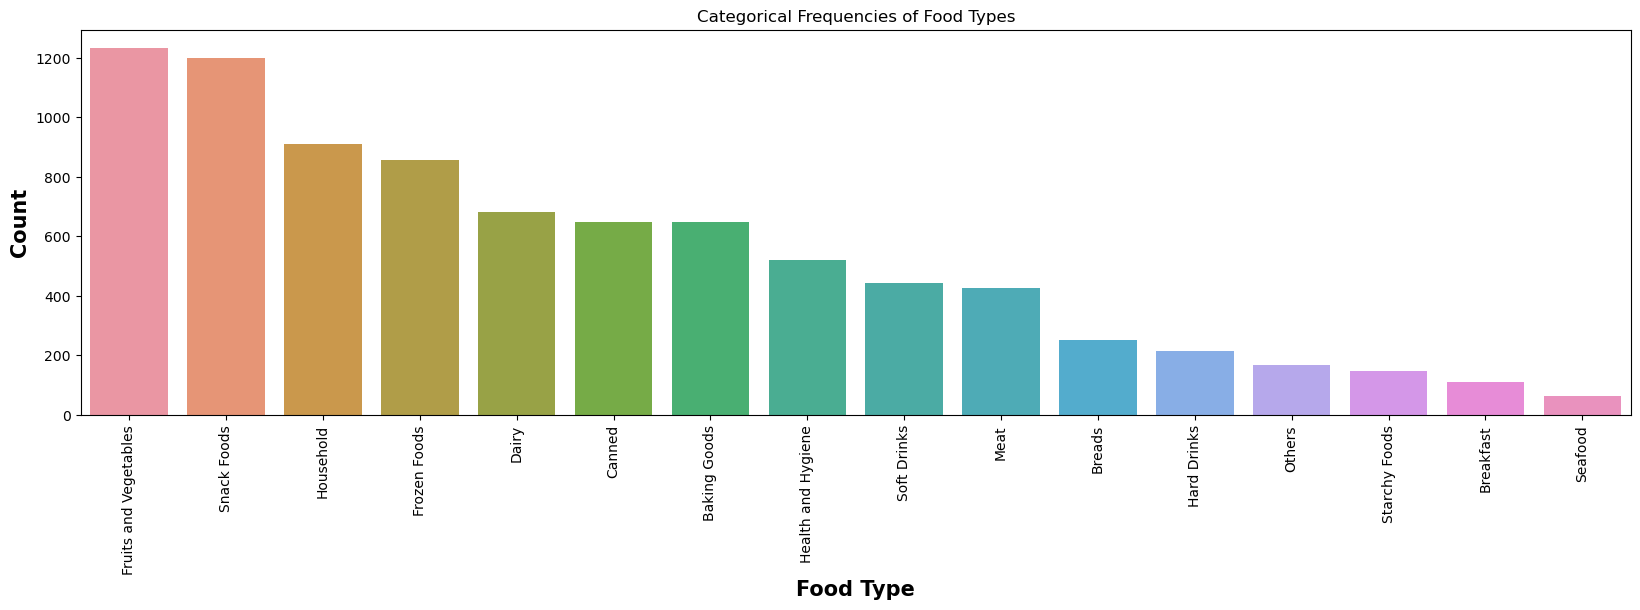

In [27]:
fig, ax = plot_bar(df, 'Item_Type', 'Item_Type');
plt.xlabel('Food Type')
plt.ylabel('Count')
plt.title('Categorical Frequencies of Food Types');
print(df['Item_Type'].value_counts())

Fruits, vegetables, and snack foods dominate in quantity. However, seafood items lie at the bottom of food types, followed by breakfast and starchy foods.

In [28]:
df['Outlet_Identifier'].value_counts() # 10 outlets

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

We've identified that outlets 10 and 19 have far fewer (just over half) row entries in our data. The rest have between 926 and 935, and so are fairer to compare.

In [29]:
outlet = df.groupby(['Outlet_Identifier', 'Outlet_Location_Type']).mean().reset_index()
outlet = outlet.sort_values(by='Item_Outlet_Sales')
sns.barplot(data=outlet, x='Item_Outlet_Sales', y='Outlet_Identifier', hue='Outlet_Location_Type')
plt.title('Average Product Sales by Outlet and Location')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_11206/545910309.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outlet = df.groupby(['Outlet_Identifier', 'Outlet_Location_Type']).mean().reset_index()


In [30]:
OT = df.groupby(['Outlet_Identifier', 'Outlet_Type']).mean().reset_index()
OT = OT.sort_values(by='Item_Outlet_Sales')
sns.barplot(data=OT, x='Item_Outlet_Sales', y='Outlet_Identifier', hue='Outlet_Type')
plt.title('Average Product Sales by Outlet and Type')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_11206/1278665150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  OT = df.groupby(['Outlet_Identifier', 'Outlet_Type']).mean().reset_index()


Outlet 27, which is a Tier/Type 3 Supermarket, far outsells the other outlets (most of which are Type 1 supermarkets). Groceries sold far fewer products compared to all types of supermarkets in comparison.

In [31]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

We now identify average outlet sales based on when the outlet was established:

In [32]:
Year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
plt.barh(Year.index, Year.values)
plt.ylabel('Year')
plt.xlabel('Total Outlet Sales')
plt.show()

In [33]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Total Outlet Sales were much lower in 1998 than in other years. While this is partly due to their being fewer outlets established that year, the total number of sales is still disportionately lower.

# PreProcessing for Machine Learning

In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')

In [35]:
mldf = pd.read_csv(filename)
mldf.head()
mldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
# Replace values using replacement dictionary in machine learning dataframe
mldf['Item_Fat_Content'] = mldf['Item_Fat_Content'].replace(replacement_dict)
mldf['Item_Fat_Content'].value_counts() # Low and Regular Fat Content are now consistent

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [37]:
# Split
X = mldf.drop('Item_Outlet_Sales', axis=1)
y = mldf['Item_Outlet_Sales']

We perform a train test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

We create a preprocessing object to prepare the dataset for Machine Learning, and make sure our imputation of missing values occurs after the train test split using SimpleImputer. 

In [39]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Imputers
constant_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [40]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [41]:
# Categorical pipeline
categorical_pipe = make_pipeline(constant_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [42]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [43]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13428c910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13428c8b0>)])

In [44]:
# fit on train
preprocessor.fit(X_train)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [45]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1593)




array([[ 0.82748547, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

# Regression Modeling

We build a linear regression model.

In [46]:
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13428c910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13428c8b0>)])),
                ('linearregression', LinearRegression())])

In [47]:
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

We evaluate the performance of our model based on R^2.

In [48]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'LR Model Training R2: {train_r2}')
print(f'LR Model Testing R2: {test_r2}')

LR Model Training R2: 0.6713233439536888
LR Model Testing R2: -4.238322313323512e+19


We evaluate the performance of our model based on rmse.

In [49]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'LR Model Training RMSE: {train_RMSE}')
print(f'LR Model Testing RMSE: {test_RMSE}')

LR Model Training RMSE: 986.2575752210826
LR Model Testing RMSE: 10813618728651.26


This is an ill-suited model given the negative R^2 score for the testing data. So we build a simple regression (Decision) tree model.

In [50]:
dec_tree = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

We compare the performance of our model based on r^2.

In [51]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(f'DT Model Training R2: {train_score}')
print(f'DT Model Testing R2: {test_score}')

DT Model Training R2: 1.0
DT Model Testing R2: 0.21988566762195583


We compare the performance of our model based on rmse.

In [52]:
train_MSE = mean_squared_error(y_train, dec_tree.predict(X_train))
test_MSE = mean_squared_error(y_test, dec_tree.predict(X_test))

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'DT Model Training RMSE: {train_RMSE}')
print(f'DT Model Testing RMSE: {test_RMSE}')

DT Model Training RMSE: 4.925864104892086e-15
DT Model Testing RMSE: 1467.0779546170936


The decision tree model is overfit. So we will tune depth by creating a loop.

In [53]:
#create a range of max_depth values
depths = range(1, dec_tree['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [54]:
scores

Train      Test
1   0.237797  0.229683
2   0.431641  0.433778
3   0.524218  0.524222
4   0.582705  0.583937
5   0.604207  0.596004
6   0.615702  0.584668
7   0.629269  0.577437
8   0.641334  0.560078
9   0.653613  0.541089
10  0.666255  0.534757
11  0.681012  0.528963
12  0.696898  0.508064
13   0.71337  0.506124
14  0.727454  0.498508
15  0.740382  0.495288
16  0.754402  0.462343
17  0.767879  0.443833
18  0.783914  0.429716
19  0.801638  0.416003
20  0.817336  0.410948
21  0.831298  0.391864
22  0.845603  0.382758
23   0.85915  0.378401
24  0.872357  0.348261
25  0.884649  0.337937
26  0.897731  0.331255
27  0.909535  0.317599
28  0.919575  0.304317
29  0.928528  0.280844
30   0.93747    0.2798
31  0.944764  0.283482
32  0.953165  0.275736
33  0.959081  0.255901
34  0.964356  0.258906
35  0.969672  0.229397
36  0.974701  0.247016
37  0.979653  0.247642
38  0.982875  0.239519
39  0.984937  0.224423
40  0.986885   0.24619
41  0.988808  0.231974
42  0.991015  0.234446
43  0.992721  0.233296
44  0.994376  0.222668
45  0.995924  0.219608
46   0.99723  0.235966
47   0.99833    0.2265
48  0.998958  0.235789
49  0.999374   0.22226
50   0.99965  0.221234
51  0.999803  0.227095
52  0.999894  0.217565
53  0.999945  0.207157
54  0.999972  0.216955
55  0.999988  0.214228
56  0.999994  0.208608
57  0.999999  0.219657
58       1.0   0.22231
59       1.0   0.21983

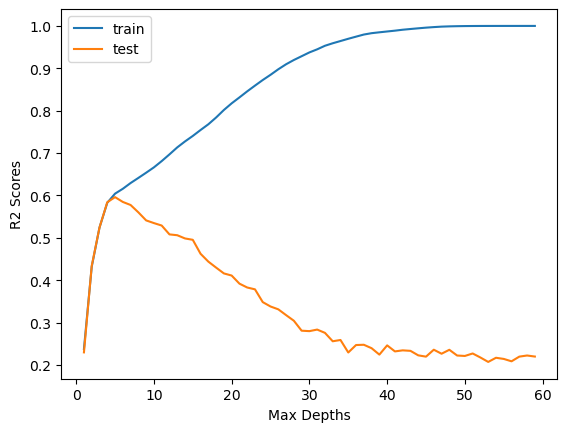

In [55]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [56]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

So we reevaluate the model with max depth 5.

In [57]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print(f'Best DT Model Training R2: {r2_score(y_train, best_tree_pipe.predict(X_train))}')
print(f'Best DT Model Testing R2: {r2_score(y_test, best_tree_pipe.predict(X_test))}')

Best DT Model Training R2: 0.6042066848171654
Best DT Model Testing R2: 0.5960039728227073


In [58]:
best_train_MSE = mean_squared_error(y_train, best_tree_pipe.predict(X_train))
best_test_MSE = mean_squared_error(y_test, best_tree_pipe.predict(X_test))

best_train_RMSE = np.sqrt(best_train_MSE)
best_test_RMSE = np.sqrt(best_test_MSE)

print(f'Best DT Model Training RMSE: {best_train_RMSE}')
print(f'Best DT Model Testing RMSE: {best_test_RMSE}')

Best DT Model Training RMSE: 1082.281287111312
Best DT Model Testing RMSE: 1055.7536944506849


Overall, we recommend the tuned Decision Tree model over Linear Regression due to the improved testing data results (we keep in mind that there is high bias even after tuning the max depth).

From the testing R^2 score we see that 59.6% of the 'Item Outlet Sales' variance is explained, with root mean square error of 1055.69.